# Top Actors/Actresses, Directors, Genres, and Countries

__Task Details:__
As mentioned above, a number of columns in this dataset have comma separated values, which makes it difficult to find how many titles an actor or actress appeared in or how many titles a director has filmed.

__Expected Submission:__
Cleanse the comma separated values into tables/dataframes for unique actors, directors, countries, and genres that can be linked back to the original dataset via the "show_id" field. There are a variety of tools and software that can accomplish this.

Once the data has been cleansed feel free to include some counting functions to find the most popular actors, actresses, and directors.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

# Import dataset
df = pd.read_csv('..//Datasets/netflix_titles.csv', parse_dates=['date_added'])

# Observe dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [3]:
# Check for null values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## Country Cleanse and Analysis

Let's analyze variable which has the least number of null values. In this case, it is a Country where the movie / show was produced. It has 507 null values. Let's observe first 5 records

In [4]:
df[df.country.isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,2019-03-30,2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,2019-12-31,2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,2019-01-05,2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...


Let's try to restore information about country from other datasets.

In [5]:
imdb = pd.read_csv('..//Datasets/IMDb movies.csv', low_memory=False, parse_dates=['date_published'])
imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [6]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [7]:
# one record in 'year' colummn in IMDB has unappropriate formating 
imdb[imdb.year.str.contains(' ')]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
83917,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,...,"Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...,7.1,23973,NaN,NaN,NaN,79.0,135.0,98.0


In [8]:
# we can replace it just by year
imdb.loc[imdb.year.str.contains(' '), 'year'] = imdb.loc[imdb.year.str.contains(' '), 'year'].str.rsplit(' ', expand=True)[2]

In [9]:
# convert release year to datetime format for the merging procedure
df.release_year = pd.to_datetime(df.release_year, format='%Y').dt.year
imdb.year = pd.to_datetime(imdb.year, format='%Y').dt.year

# drop duplicates in subset
imdb = imdb.drop_duplicates(subset=['original_title', 'year'])

In [10]:
# merge 2 datasets by title and release year
df = df.merge(imdb.add_suffix('_imdb'), how='left', left_on=['title','release_year'], right_on=['original_title_imdb','year_imdb'])

In [11]:
# unfortunately we can restore only 13 record
len(df[(df.country.isna()) & (df.country_imdb.notnull())])

13

In [12]:
# anyway replace these records 
df.loc[df.country.isna(), 'country'] = df.loc[df.country.isna(), 'country_imdb']

In [13]:
# number of replaceble cast
len(df.loc[(df.cast.isna()) & (df.actors_imdb.notnull())])

11

In [14]:
# replace null cast records by actors 
df.loc[(df.cast.isna()) & (df.actors_imdb.notnull()), 'cast'] = df.loc[(df.cast.isna()) & (df.actors_imdb.notnull()), 'actors_imdb']

In [15]:
# number of replaceble director
len(df.loc[(df.director.isna()) & (df.director_imdb.notnull())])

30

In [16]:
# replace null director records by director from IMDb
df.loc[(df.director.isna()) & (df.director_imdb.notnull()), 'director'] = df.loc[(df.director.isna()) & (df.director_imdb.notnull()), 'director_imdb']

In [17]:
# drop duplicared columns 
df = df.drop(df.columns[12:], axis=1)

In [18]:
df.isna().sum()

show_id            0
type               0
title              0
director        2359
cast             707
country          494
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
# subset dataset and split 
country = df.loc[df.country.notnull(), 'country'].astype('str').apply(lambda t: t.split(', '))

# Convert DataFrame column into list of strings
country = list(country)

# number of movies
len(country)

7293

In [30]:
# Instantiate encoder and identify unique records
encoder = TransactionEncoder().fit(country)

# One-hot encode transactions
onehot = encoder.transform(country)

# Convert one-hot encoded data to DataFrame and set show_id as index
onehot_country = pd.DataFrame(onehot, columns = encoder.columns_, index=df.loc[df.country.notnull(), 'show_id'])

# Print the one-hot encoded transaction dataset
onehot_country.head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,"United Kingdom,",United States,"United States,",Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
show_id,,,,,,,,,,,,,,,,,,,,,
s1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
s5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [21]:
# Print the one-hot encoded dataset
country_share = onehot_country.mean().sort_values(ascending=False).round(4) * 100
country_share

United States         45.19
India                 13.63
United Kingdom         9.90
Canada                 5.65
France                 4.80
                      ...  
Dominican Republic     0.01
Samoa                  0.01
Cyprus                 0.01
Jamaica                0.01
Afghanistan            0.01
Length: 122, dtype: float64

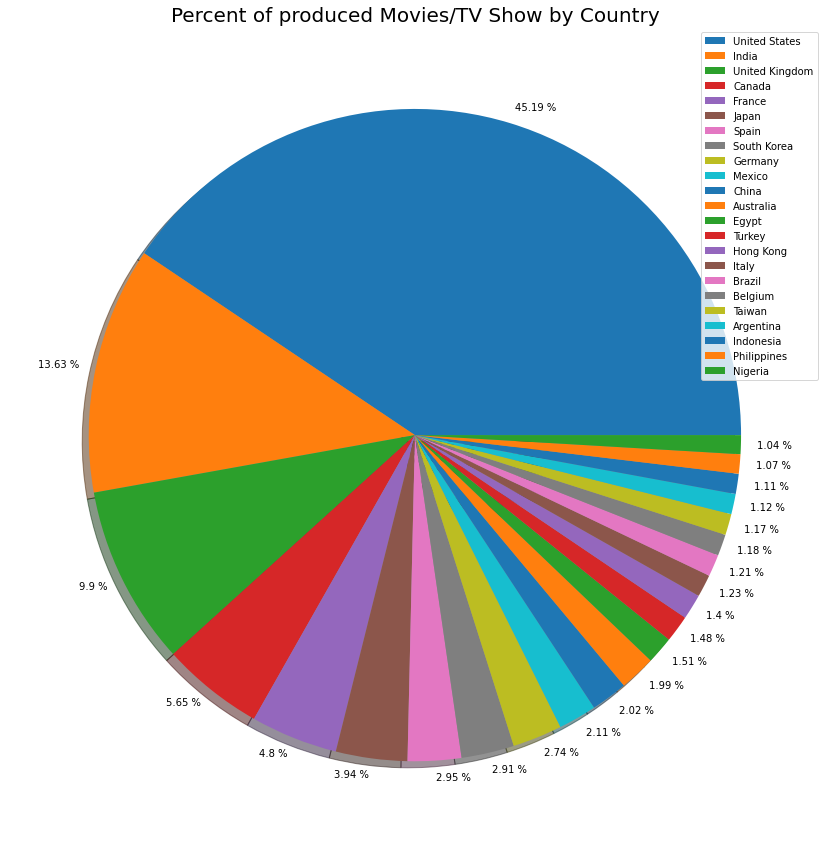

In [24]:
# take countries that share more than 1%
country_share = country_share[country_share > 1]
labels = country_share.round(3).astype('str') + ' %'

fig1, ax1 = plt.subplots(figsize=(20,15), facecolor='white')
ax1.pie(country_share, labels=labels, labeldistance=1.05,
        shadow=True)
plt.title('Percent of produced Movies/TV Show by Country', fontsize=20)
plt.legend(labels=country_share.index, loc='upper right')
plt.show()

In [26]:
# Compute frequent itemsets using the Apriori algorithm
frequency = apriori(onehot_country[onehot_country['United States'] == True], 
                            min_support = 0.0001, 
                            max_len = 4, 
                            use_colnames = True).rename({'support':'frequency', 'itemsets':'Countries'}, axis=1)

# sort row which contain 'United States' and more than 1 country
frequency = frequency[(frequency.Countries.apply(lambda t: 'United States' in t)) & (frequency.Countries.apply(lambda t: len(t) >= 2))]\
                    .sort_values('frequency', ascending=False).round(3)

# Print a preview of the frequent itemsets
frequency.head()

,frequency,Countries
531,0.070,"(United Kingdom, United States)"
207,0.057,"(United States, Canada)"
301,0.030,"(United States, France)"
324,0.022,"(United States, Germany)"
400,0.015,"(United States, Japan)"


## Genre Cleanse

In [27]:
# subset dataset and split 
genre = df['listed_in'].apply(lambda t: t.split(', '))

# Convert DataFrame column into list of strings
genre = list(genre)

# number of movies/TV Shows
len(genre)

7787

In [62]:
# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(genre)

# One-hot encode transactions
onehot = encoder.transform(genre)

# Convert one-hot encoded data to DataFrame and set show_id as index
onehot_genre = pd.DataFrame(onehot, columns = encoder.columns_, index=df['show_id'])

# Print the one-hot encoded transaction dataset
onehot_genre.shape

(7787, 42)

In [29]:
genre_count = onehot_genre.sum().sort_values(ascending=False)
genre_count.head()

International Movies      2437
Dramas                    2106
Comedies                  1471
International TV Shows    1199
Documentaries              786
dtype: int64

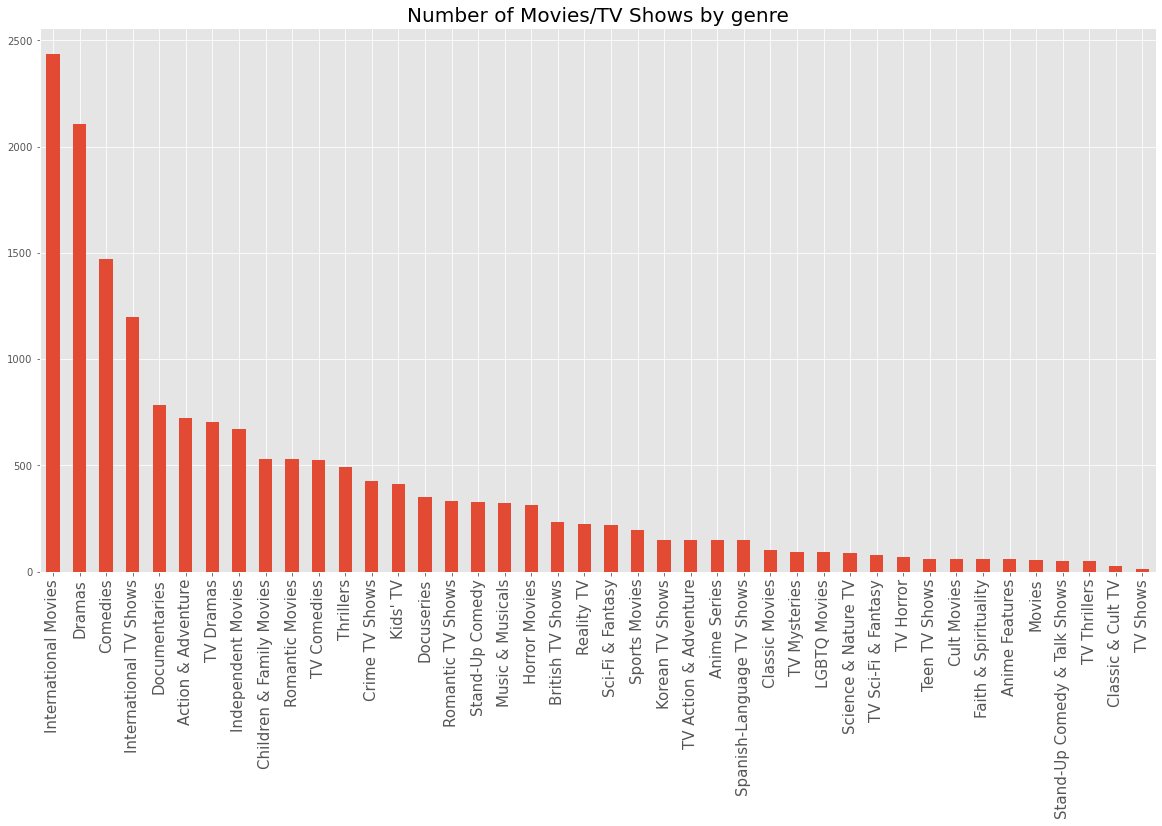

In [59]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
genre_count.plot(kind='bar')
plt.xticks(rotation='90')
plt.tick_params(axis='x', labelsize=15)
plt.title('Number of Movies/TV Shows by genre', fontsize=20)
plt.show()

In [123]:
# Compute frequent itemsets using the Apriori algorithm
frequency = apriori(onehot_genre, 
                    min_support = 0.0001, 
                    max_len = 2, 
                    use_colnames = True).rename({'support':'frequency', 'itemsets':'Genre'}, axis=1)

# sort row which contain 'International Movies' and more than 1 country
frequency = frequency[(frequency.Genre.apply(lambda t: 'International Movies' in t)) & (frequency.Genre.apply(lambda t: len(t) >= 2))]\
                    .sort_values('frequency', ascending=False).round(3)

frequency.head()

,frequency,Genre
186,0.166,"(International Movies, Dramas)"
131,0.094,"(International Movies, Comedies)"
52,0.045,"(Action & Adventure, International Movies)"
215,0.042,"(International Movies, Romantic Movies)"
166,0.034,"(International Movies, Documentaries)"


## Cast Cleanse

In [148]:
# subset dataset and split 
cast = df.loc[df.cast.notnull(),'cast'].astype('str').apply(lambda t: t.split(', '))

# Convert DataFrame column into list of strings
cast = list(cast)

# number of movies/TV Shows
len(cast)

7080

In [152]:
# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(cast)

# One-hot encode transactions
onehot = encoder.transform(cast)

# Convert one-hot encoded data to DataFrame and set show_id as index
onehot_cast = pd.DataFrame(onehot, columns = encoder.columns_, index=df.loc[df.cast.notnull(),'show_id'])

# Print the one-hot encoded transaction dataset
onehot_cast.shape

(7080, 32966)

In [159]:
onehot_cast.sum().sort_values(ascending=False)

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Takahiro Sakurai    29
                    ..
Mavrick Moreno       1
Mawar Rashid         1
Mawi                 1
Max Bremer           1
Kim Ho-jung          1
Length: 32966, dtype: int64

In [ ]:
df[df.cast.astype('str').apply(lambda t: 'Anupam Kher' in t)]

In [82]:
def cast(actor):
    data = df[df.cast.astype('str').apply(lambda t: actor in t)]
    return(data)

## Director Cleanse
---

In [164]:
# subset dataset and split 
director = df.loc[df.director.notnull(),'director'].astype('str').apply(lambda t: t.split(', '))

# Convert DataFrame column into list of strings
director = list(director)

# number of movies/TV Shows
len(director)

5428

In [165]:
# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(director)

# One-hot encode transactions
onehot = encoder.transform(director)

# Convert one-hot encoded data to DataFrame and set show_id as index
onehot_director = pd.DataFrame(onehot, columns = encoder.columns_, 
                               index=df.loc[df.director.notnull(),'show_id'])

# Print the one-hot encoded transaction dataset
onehot_director.shape

(5428, 4501)

In [166]:
onehot_director.sum().sort_values(ascending=False)

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
                       ..
Stuart Stone            1
Louie Psihoyos          1
Louie Gibson            1
Lotje Sodderland        1
Kevin Munroe            1
Length: 4501, dtype: int64

In [170]:
def director(name):
    data = df[df.director.astype('str').apply(lambda t: name in t)]
    return(data)

In [172]:
director('Jan Suter').country.unique()

array(['Mexico', 'Colombia', 'Argentina', 'Chile'], dtype=object)